# The battle of neighborhoods - Best Cities to Buy a Home in MA - Recommender Model

# Introduction:

### Massachusetts has 14 Counties, 39 Cities and 312 Towns. Mass is well endowed with neighborhoods that are active, vibrant, progressive, thoughtful, diverse, fun, friendly, filled with natural beauty and historic charm. This abundance in choice increases the complexity for home buyers in their decision making process. While buying a home, the neighborhood matters the most, sometimes even higher than the home itself. With the help of Data Science, we are attempting to help "Young Home Buyers with Kids" to chose a neighborhood that supports an active lifestyle, surrounded by natural beauty, good education, safety, well connected public transport system based on the prevailing Median Pricing. The home buyer can then shop for homes within the neighborhood.

# Target Audience:
## Home Buyers - Young Family with Kids

## Objective
### Our objective is to perform an detailed exploratory analysis and recommend a neighborhood by finding answers to the below:
#### 1. Which Neighborhood has the most Parks & Recreation avenues for a young family with toddlers/kids?
##### - This covers Trails, Rivers, Beaches, Water fronts, Public Parks that support an active lifestlye in a nature backdrop for the family.
#### 2. Which Neighborhood has the most Best Schools?
##### - This covers public Kindergarten, Elementary, Middle & High Schools that provide for good education and wholesome development of children in the family.
#### 3. Which Neighborhood has the best transit score for easy commute?
##### - This covers public transport systems that enables the family to get around with ease.
#### 4. Which Neighborhood is safest with the least Crime Rate?
##### - This covers the safety of the neighborhoods. Includes a total count of both, violent and property crime counts by city. Crime Rate is derived using total population.
#### 5. Suggest Top 50 Best Neighborhoods in Massachusetts for a "Young Family with Kids" to own a home.

# Why it is important :
### Massachusetts has multipe culturally rich, diverse, vibrant neighborhoods with varying home prices, often overwhelming and complicating the home buyer's decision making process. Our system attempts to simplify the process by recommending the Best 50 Neighborhoods in MA for a "Young Family with Kids" to own a home.



# Data Sourcing:
### 1. We would need a list of Median Home Sale Prices of MA nieghborhoods (City/Zip Code level)
### Data can be sourced from RedFin, a National Real Estate Brokerage, https://www.redfin.com/blog/data-center/
#### Data Points - Zip Code, City, County, Median Sale Price. 
For E.g.: 02148, Malden, 500000

### 2. We would need neighborhood specific information like Supermarkets, Trails, Parks, Water Fronts, Restaurants, Coffee Shops, Gyms ets.
### Data can be sourced with help of FOURSQUARE Developer Apps, https://foursquare.com/developers/apps
#### Data Points - Zip Code, City, Lattitue, Longitude, Venues, Venue Categories 
Using Get_Venue API we can source the list of venues and venue category information around 5 KM radius of each Neighborhood
For E.g.: 01906, Saugus, -71.0110, 42.4651, Breakheart Reservation, Trail

### 3. We would need list of public schools in a neighborhood and their progress and performance index information.
### Data can be sourced for the year 2017 from https://www.kaggle.com/ndalziel/massachusetts-public-schools-data
#### Data Points - Zip Code, City, County, School, School PPI etc.
For E.g.: 02478, Belmont, Middlesex, Belmont High, 100

### 4. We would need transit scores, walkability scores, bikeability scores of a neighborhood
### Data can be sourced from https://www.walkscore.com/MA
#### Data Points - Zip Code, City, Walk Score, Transit Score, Bike Score etc.
For E.g.: 02138, Cambridge, 88, 74, 96

### 5. We need crime statistics for Mass by city or zip code
### Data can be sourced from https://ucr.fbi.gov/crime-in-the-u.s/2018/crime-in-the-u.s.-2018/downloads/download-printable-files
#### Data Points - City, Population, Number of Violent Crime, Number of Property Crime etc.
For E.g.: Hoyolke, 40470, 191, 1640

### 6. We would need list of neighborhoods in MA with 1 set of latitude and longitude coordinates
### We can source it from: https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/export/?refine.state=MA
#### Data Points - Zip Code, City, Latitude and Longitude
For E.g.: 01701, Framingham, -71.4162, 42.2793 

### 7. We would need Zip Codes to City to County crossreference mapping
### Data can be sourced from https://www.unitedstateszipcodes.org/ma/#zips-list
#### Data Points - Zip Code, City, County
For E.g.: 01020, Springfield, Hampden 

### 8. We would need GeoJSON GeoSpatial Coordinates data of City boundaries for maps, choropleths 
### Data can be sourced from http://maps-massgis.opendata.arcgis.com/datasets/43664de869ca4b06a322c429473c65e5_0.geojson
#### Data Points - City, GeoSpatial Lat, Long coordinates define polygonal shape boundaries of cities
For E.g.: QUINCY, (-70.987520657600399, 42.304533090819092), (-70.987515724246094, 42.304588167507383), (-70.98749032019883, 42.304654946893386), ......, (-70.960227444070043, 42.29578425180248)


# Methodology:
### Import necessary libraries
## PRIMARY Data Set - Data Wrangling
### * Source a MA Neighborhood list by Zip, City, Single Set of Latitude and Longitude Coordinates to indicating the Center of the Neighborhood 
Source and cleanse data to be used for Foursquare API calls
### * Make Foursquare API Call, to pull All available Venues within 5Km radius of Center of a Neighborhood
Pass Zip, City, Lat, Long. Source all the Venues and Venue Category data within 5Km Radius
### * Transform Foursquare Output: Get Number of Recreational Venues
We derive it using the Venue Category information provided by Foursquare. 
Recreation Count = Total Number of Venues with Venue Category containing text like Trail or River or Beach or Waterfront or Park
### * Transform Foursquare Output: Get Number of Fitness Venues
We derive it using the Venue Category information provided by Foursquare. 
Fitness Count = Total Number of Venues with Venue Category containing text like Gym or Fitness 
### * Transform Foursquare Output: Get Number of Eatery Venues
We derive it using the Venue Category information provided by Foursquare. 
Eateries Count = Total Number of Venues with Venue Category containing text like Restaurant or Bakery or Coffee 
### * Transform Foursquare Output: Get Number of Grocery Venues
We derive it using the Venue Category information provided by Foursquare. 
Groceries Count = Total Number of Venues with Venue Category containing text like Supermarket or Grocer 
### * Transform Foursquare Output: Get Number of Hospitals Venues
We derive it using the Venue Category information provided by Foursquare. 
Hospitals Count = Total Number of Venues with Venue Category containing text like Hospital 
### * The resultant Venue Detail Counts with Zip, City, Lat, Long, will be out PRIMARY data set
### * The PRIMARY data set will be enhanced in the below steps by JOINING with data sets

## SECONDARY Data Sets - Enhance the PRIMARY Data Set by JOIN
### * Source Median Home Sale Prices for MA Neighborhoods
Source and cleanse data to get the most recent Median Home Sale Prices at the City, Zip Code level. It's more of macro data rather than the micro individual home sale prices.
### * Source Public School information for MA Neighborhoods
Source and cleanse data to get the Number of schools and their Performance and Progress Index (PPI) within a neighborhood. Determine if they are best schools by comparing School PPI with Median School PPI (71%).
### * Source Neighborhood Ratings - Transit Scores, Walkability Scores, Bikeability Scores
### * Source Neighborhood Crime Statistics for MA Cities
Source and cleanse data. Determine Total Crimes. Derive Crime Rate by using Population number.
### * JOIN the PRIMARY and SECONDARY Data Sets
### * Perform Correlation Analysis
### * Perform Regression Plot Analysis

## Data Analysis & Data Visualization
### * Source GeoJSON file for MA Cities - GeoSpatial Coordinates data of City boundaries for maps, choropleths
Source and cleanse GeoJSON data. Use it for Maps and Choropleths
### * Create Choropleths to Show Median Home Prices per City
### * Create Choropleths to Show Best School Counts per City
### * Create Choropleths to Show Crime per City
### * Determine the Best 50 Neighborhoods
### * Super Impose maps to show the Best 50 Neighborhoods in MA for Young Family with Kids to buy a home


In [2]:
# Matplotlib and associated plotting modules
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
!pip install beautifulsoup4
from bs4 import BeautifulSoup
!pip install geocoder
import geocoder
import os
!pip install folium
import folium # map rendering library
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
%matplotlib inline 
#!conda install -c conda-forge basemap-data-hires 
#!conda install -c conda-forge basemap-data-hires
print('Libraries imported.')

     |████████████████████████████████| 122kB 8.2MB/s eta 0:00:01
     |████████████████████████████████| 102kB 7.0MB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/d2/3d/fa76db83bf75c4f8d338c2fd15c8d33fdd7ad23a9b5e57eb6c5de26b430e/click-7.1.2-py2.py3-none-any.whl
     |████████████████████████████████| 829kB 7.7MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    -----------------------------------------------------

### Sourced MA Neighborhood list by Zip, City, Single Set of Latitude and Longitude Coordinates to indicating the Center of the Neighborhood as a CSV and loaded into Pandas Data Frame

In [2]:
Geospatial_Coordinates = pd.read_csv('suresh_us-zip-code-latitude-and-longitude.csv') 
Geospatial_Coordinates.columns=["Zip","City","State","Latitude","Longitude"]
Geospatial_Coordinates['Zip']=Geospatial_Coordinates['Zip'].apply(lambda x: '{0:0>5}'.format(x))

### FOURSQUARE API 

In [3]:
CLIENT_ID = 'xxxxx' 
CLIENT_SECRET = 'xxxxx' 
VERSION = '20190720'

print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

CLIENT_ID: xxxxx
CLIENT_SECRET:xxxxx


### Define function to get venues using FOURSQUARE API Calls

In [85]:
def get_venues(Zip, City, lat,lng):
    
    #set variables
    radius=5000
    LIMIT=1000
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([Zip, City, venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['Zip', 'City','ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

### PRIMARY Data Set - Make Foursquare API Call, to pull All available Venues within 5Km radius of Center of a Neighborhood
###### Pass Zip, City, Lat, Long. Source all the Venues and Venue Category data within 5Km Radius
### * Derive below Data Points and WRITE into a Data Frame.
###### Recreation Count = Total Number of Venues with Venue Category containing text like Trail or River or Beach or Waterfront or Park
###### Fitness Count = Total Number of Venues with Venue Category containing text like Gym or Fitness 
###### Eateries Count = Total Number of Venues with Venue Category containing text like Restaurant or Bakery or Coffee 
###### Groceries Count = Total Number of Venues with Venue Category containing text like Supermarket or Grocer 
###### Hospitals Count = Total Number of Venues with Venue Category containing text like Hospital 


In [86]:
import re
recreation_count=0
fitness_count=0
hospital_count=0
eateries_count=0
groceries_count=0
column_names=['Zip','Neighborhood', 'recreation_count','fitness_count','hospital_count','eateries_count','groceries_count']
venue_details=pd.DataFrame(columns=column_names)

for row in Geospatial_Coordinates.values.tolist():
    Zip, City, State, Latitude, Longitude=row
    venues = get_venues(Zip, City, Latitude, Longitude)
    #venue_with_trails=venues[venues['Category']=='Trail']  
    recreation_count = str(np.sum(venues['Category'].str.contains('Trail|River|Beach|Waterfront|Park',flags=re.IGNORECASE, regex=True)))
    fitness_count = str(np.sum(venues['Category'].str.contains('Gym|Fitness',flags=re.IGNORECASE, regex=True)))
    hospital_count = str(np.sum(venues['Category'].str.contains('Hospital',flags=re.IGNORECASE, regex=False)))
    eateries_count = str(np.sum(venues['Category'].str.contains('Restaurant|Bakery',flags=re.IGNORECASE, regex=True)))
    groceries_count = str(np.sum(venues['Category'].str.contains('Supermarket',flags=re.IGNORECASE, regex=False)))
    venue_details = venue_details.append({'Zip':Zip,'Neighborhood': City, 
                                          'recreation_count': recreation_count, 'fitness_count' : fitness_count,
                                          'hospital_count' : hospital_count, 'eateries_count' : eateries_count,
                                          'groceries_count' : groceries_count
                                         }, ignore_index=True)      
venue_details    

,Zip,Neighborhood,recreation_count,fitness_count,hospital_count,eateries_count,groceries_count
0,02351,Abington,2,3,0,16,1
1,02018,Accord,6,1,0,22,0
2,01720,Acton,2,5,0,22,2
3,02743,Acushnet,1,0,0,13,1
4,01220,Adams,2,0,0,4,1
5,01001,Agawam,13,4,0,19,0
6,02134,Allston,4,1,0,32,0
7,01913,Amesbury,2,3,0,16,2
8,01002,Amherst,1,0,0,25,1
9,01004,Amherst,1,0,0,25,1


### * JOIN based on Zip Code and Enhance PRIMARY Dataset with Latitue & Longitude Coordinates Information of Neighborhood

venue_details = pd.merge(left=venue_details, right=Geospatial_Coordinates, left_on='Zip', right_on='Zip')

In [88]:
venue_details.head()

,Zip,Neighborhood,recreation_count,fitness_count,hospital_count,eateries_count,groceries_count,City,State,Latitude,Longitude
0,02351,Abington,2,3,0,16,1,Abington,MA,42.119534,-70.947870
1,02018,Accord,6,1,0,22,0,Accord,MA,41.970474,-70.701357
2,01720,Acton,2,5,0,22,2,Acton,MA,42.477142,-71.442200
3,02743,Acushnet,1,0,0,13,1,Acushnet,MA,41.697015,-70.910190
4,01220,Adams,2,0,0,4,1,Adams,MA,42.619727,-73.118420


In [89]:
venue_details=venue_details.drop(['City', 'State'], axis=1)

### * Enhance PRIMARY Dataset with "Median Home Sales Price" Information by JOIN with RedFin Home Sales Dataset

In [90]:
home_sales = pd.read_csv('Redfin_Zipcode_HomeSales_Full_Data_Download.csv') 
home_sales.columns=["Region","Homes Sold","Inventory","Median Sale Price","New Listings"]
home_sales['Region']=home_sales['Region'].apply(lambda x: '{0:0>5}'.format(x))

In [91]:
home_sales.head()

,Region,Homes Sold,Inventory,Median Sale Price,New Listings
0,02189,43,25.0,385000,53.0
1,01880,55,31.0,574000,87.0
2,02061,30,43.0,690000,53.0
3,02667,15,39.0,571000,31.0
4,01907,38,34.0,521000,57.0


In [5]:
home_sales_revised = pd.read_csv('full_Redfin_Zipcode_HomeSales_Full_Data_Download.csv') 
home_sales_revised.columns=["Region","Period","Median Sale Price"]
home_sales_revised['Region']=home_sales_revised['Region'].apply(lambda x: '{0:0>5}'.format(x))

In [6]:
home_sales_revised.head()

,Region,Period,Median Sale Price
0,01834,Jan-12,250000
1,02481,Jan-12,925000
2,02743,Jan-12,188000
3,01746,Feb-12,285000
4,01506,Mar-12,120000


In [7]:
home_sales_revised.shape

(39075, 3)

### Get the Most Recent Median Home Sales Price within a Neighborhood - Zip Code (Region)

In [8]:
grouped_home_sales = home_sales_revised.groupby(['Region']).agg({'Period': ['max']})


In [9]:
grouped_home_sales.head()


,Period
,max
Region,
01005,Sep-19
01010,Sep-17
01031,Sep-19
01037,Sep-19
01068,Sep-19


In [10]:
grouped_home_sales.shape

(416, 1)

In [11]:
grouped_home_sales.columns = ['period_max']

In [12]:
grouped_home_sales = grouped_home_sales.reset_index()

In [13]:
grouped_home_sales.head()

,Region,period_max
0,01005,Sep-19
1,01010,Sep-17
2,01031,Sep-19
3,01037,Sep-19
4,01068,Sep-19


In [14]:
home_sales_revised = pd.merge(left=home_sales_revised, right=grouped_home_sales, left_on=['Region','Period'], right_on=['Region','period_max'])

In [15]:
home_sales_revised.head()


,Region,Period,Median Sale Price,period_max
0,02659,Sep-19,370000,Sep-19
1,02093,Sep-19,490000,Sep-19
2,01863,Sep-19,365000,Sep-19
3,01803,Sep-19,630000,Sep-19
4,02019,Sep-19,325000,Sep-19


In [16]:
home_sales_revised.shape

(416, 4)

In [17]:
home_sales_revised = home_sales_revised.drop(['Period', 'period_max'], axis=1)

In [18]:
home_sales_revised.head()

,Region,Median Sale Price
0,02659,370000
1,02093,490000
2,01863,365000
3,01803,630000
4,02019,325000


### Due to Foursquare API Call Limits - Store the Results into a CSV. So it can be used later in case API Call Limits issue

In [92]:
venue_details.to_csv('city_attr_lat_long.csv')

In [3]:
venue_details = pd.read_csv('city_attr_lat_long.csv') 
venue_details.columns=["Zip","Neighborhood","recreation_count","fitness_count","hospital_count","eateries_count","groceries_count","Latitude","Longitude"]
venue_details['Zip']=venue_details['Zip'].apply(lambda x: '{0:0>5}'.format(x))

#### Last Step in Merging the Revised RedFin Data to the PRIMARY Data Set

In [19]:
venue_details = pd.merge(left=venue_details, right=home_sales_revised, left_on='Zip', right_on='Region')

In [20]:
venue_details.head()

,Zip,Neighborhood,recreation_count,fitness_count,hospital_count,eateries_count,groceries_count,Latitude,Longitude,Region,Median Sale Price
0,02351,Abington,2,3,0,16,1,42.119534,-70.94787,02351,360000
1,01720,Acton,2,5,0,22,2,42.477142,-71.44220,01720,604000
2,02743,Acushnet,1,0,0,13,1,41.697015,-70.91019,02743,306000
3,02134,Allston,4,1,0,32,0,42.355147,-71.13164,02134,560000
4,01913,Amesbury,2,3,0,16,2,42.854423,-70.93547,01913,375000


In [21]:
venue_details=venue_details.drop(['Region'], axis=1)

In [23]:
venue_details.head()
venue_details.shape

(415, 10)

In [25]:
venue_details.to_csv('415_city_attr_lat_long_median_price.csv',index=False)

In [50]:
venue_details = pd.read_csv('415_city_attr_lat_long_median_price.csv') 
#venue_details.columns=["Region","Homes Sold","Inventory","Median Sale Price","New Listings"]
venue_details['Zip']=venue_details['Zip'].apply(lambda x: '{0:0>5}'.format(x))

In [27]:
venue_details.head()

,Zip,Neighborhood,recreation_count,fitness_count,hospital_count,eateries_count,groceries_count,Latitude,Longitude,Median Sale Price
0,02351,Abington,2,3,0,16,1,42.119534,-70.94787,360000
1,01720,Acton,2,5,0,22,2,42.477142,-71.44220,604000
2,02743,Acushnet,1,0,0,13,1,41.697015,-70.91019,306000
3,02134,Allston,4,1,0,32,0,42.355147,-71.13164,560000
4,01913,Amesbury,2,3,0,16,2,42.854423,-70.93547,375000


In [51]:
venue_details.shape

(415, 10)

### Source Neighborhood Ratings - Transit Scores, Walkability Scores, Bikeability Scores 

In [29]:
ma_walk_transit = pd.read_csv('MA_City_Walk_Transit_Score.csv') 
#venue_details.columns=["Region","Homes Sold","Inventory","Median Sale Price","New Listings"]
ma_walk_transit['Zip Code']=ma_walk_transit['Zip Code'].apply(lambda x: '{0:0>5}'.format(x))

ma_walk_transit.head()

In [32]:
ma_walk_transit=ma_walk_transit.drop(['Unnamed: 6'], axis=1)

In [33]:
ma_walk_transit.head()

,City,Zip Code,Walk Score,Transit Score,Bike Score,Population
0,Somerville,02145,89,64,89,"75,754"
1,Cambridge,02138,88,74,96,"105,162"
2,Everett,02149,83,49,52,"41,667"
3,Boston,02124,82,72,70,"617,594"
4,Chelsea,02150,81,57,47,"35,177"


In [34]:
ma_walk_transit.dtypes

City             object
Zip Code         object
Walk Score        int64
Transit Score     int64
Bike Score        int64
Population       object
dtype: object

In [35]:
ma_walk_transit['Population']=ma_walk_transit['Population'].apply(lambda x: str(x.replace(',','')))
ma_walk_transit['Population']=ma_walk_transit['Population'].astype(str).astype(float)

In [36]:
ma_walk_transit.dtypes

City              object
Zip Code          object
Walk Score         int64
Transit Score      int64
Bike Score         int64
Population       float64
dtype: object

In [52]:
print(venue_details.dtypes)

Zip                   object
Neighborhood          object
recreation_count       int64
fitness_count          int64
hospital_count         int64
eateries_count         int64
groceries_count        int64
Latitude             float64
Longitude            float64
Median Sale Price     object
dtype: object


In [45]:
%%capture
! pip install seaborn
import seaborn as sns

#### Address Data Quality & Data Type Issues

In [53]:
venue_details['Median Sale Price']=venue_details['Median Sale Price'].apply(lambda x: str(x.replace(',','')))

In [54]:
venue_details['recreation_count']=venue_details['recreation_count'].astype(str).astype(int)
venue_details['fitness_count']=venue_details['fitness_count'].astype(str).astype(int)
venue_details['hospital_count']=venue_details['hospital_count'].astype(str).astype(int)
venue_details['eateries_count']=venue_details['eateries_count'].astype(str).astype(int)
venue_details['groceries_count']=venue_details['groceries_count'].astype(str).astype(int)
venue_details['Median Sale Price']=venue_details['Median Sale Price'].astype(str).astype(float)

In [55]:
venue_details
print(venue_details.dtypes)

Zip                   object
Neighborhood          object
recreation_count       int64
fitness_count          int64
hospital_count         int64
eateries_count         int64
groceries_count        int64
Latitude             float64
Longitude            float64
Median Sale Price    float64
dtype: object


In [56]:
venue_details.head()
venue_details.shape

(415, 10)

### JOIN PRIMARY Data Set with Neighborhood Transit Ratings/Scores

In [57]:
venue_details = pd.merge(left=venue_details, right=ma_walk_transit, left_on='Zip', right_on='Zip Code', how ='left')

In [58]:
venue_details.shape

(415, 16)

In [59]:
venue_details.head()

,Zip,Neighborhood,recreation_count,fitness_count,hospital_count,eateries_count,groceries_count,Latitude,Longitude,Median Sale Price,City,Zip Code,Walk Score,Transit Score,Bike Score,Population
0,02351,Abington,2,3,0,16,1,42.119534,-70.94787,360000.0,NaN,NaN,NaN,NaN,NaN,NaN
1,01720,Acton,2,5,0,22,2,42.477142,-71.44220,604000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,02743,Acushnet,1,0,0,13,1,41.697015,-70.91019,306000.0,NaN,NaN,NaN,NaN,NaN,NaN
3,02134,Allston,4,1,0,32,0,42.355147,-71.13164,560000.0,NaN,NaN,NaN,NaN,NaN,NaN
4,01913,Amesbury,2,3,0,16,2,42.854423,-70.93547,375000.0,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
venue_details.head()

,Zip,Neighborhood,recreation_count,fitness_count,hospital_count,eateries_count,groceries_count,Latitude,Longitude,Median Sale Price,City,Zip Code,Walk Score,Transit Score,Bike Score,Population
0,02351,Abington,2,3,0,16,1,42.119534,-70.94787,360000.0,0,0,0.0,0.0,0.0,0.0
1,01720,Acton,2,5,0,22,2,42.477142,-71.44220,604000.0,0,0,0.0,0.0,0.0,0.0
2,02743,Acushnet,1,0,0,13,1,41.697015,-70.91019,306000.0,0,0,0.0,0.0,0.0,0.0
3,02134,Allston,4,1,0,32,0,42.355147,-71.13164,560000.0,0,0,0.0,0.0,0.0,0.0
4,01913,Amesbury,2,3,0,16,2,42.854423,-70.93547,375000.0,0,0,0.0,0.0,0.0,0.0


In [70]:
venue_details.dtypes

Zip                   object
Neighborhood          object
recreation_count       int64
fitness_count          int64
hospital_count         int64
eateries_count         int64
groceries_count        int64
Latitude             float64
Longitude            float64
Median Sale Price    float64
City                  object
Zip Code              object
Walk Score           float64
Transit Score        float64
Bike Score           float64
Population           float64
dtype: object

In [72]:
venue_details
venue_details=venue_details.drop(['City','Zip Code'], axis=1)

In [73]:
venue_details.dtypes

Zip                   object
Neighborhood          object
recreation_count       int64
fitness_count          int64
hospital_count         int64
eateries_count         int64
groceries_count        int64
Latitude             float64
Longitude            float64
Median Sale Price    float64
Walk Score           float64
Transit Score        float64
Bike Score           float64
Population           float64
dtype: object

#### Address Data Quality & Data Type Issues

In [65]:
venue_details=venue_details.replace(np.NaN,0)
venue_details['Walk Score'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Walk Score, dtype: float64

### Due to Foursquare API Call Limits - Periodically Writing the Resultant Dataframe (Primary Joined with Secondary data sets) into CSV file as a fallback/workaround

In [74]:
venue_details.to_csv('transit_415_city_attr_lat_long_median_price.csv',index=False)

In [16]:
venue_details = pd.read_csv('transit_415_city_attr_lat_long_median_price.csv') 
#venue_details.columns=["Region","Homes Sold","Inventory","Median Sale Price","New Listings"]
venue_details['Zip']=venue_details['Zip'].apply(lambda x: '{0:0>5}'.format(x))

In [17]:
venue_details.shape

(415, 14)

In [18]:
venue_details.dtypes

Zip                   object
Neighborhood          object
recreation_count       int64
fitness_count          int64
hospital_count         int64
eateries_count         int64
groceries_count        int64
Latitude             float64
Longitude            float64
Median Sale Price    float64
Walk Score           float64
Transit Score        float64
Bike Score           float64
Population           float64
dtype: object

#### Source Neighborhood Crime Statistics for MA Cities

In [6]:
crimes = pd.read_csv('Mass_Total_Known_Offenses_City_2018.csv')
crimes.head()

,City,Total Violent Crimes,Total Property Crimes
0,Abington,41,147
1,Acton,26,156
2,Acushnet,19,69
3,Adams,23,96
4,Agawam,105,428


In [10]:
crimes.dtypes

City                      object
Total Violent Crimes     float64
Total Property Crimes    float64
dtype: object

In [9]:
crimes['Total Violent Crimes']=crimes['Total Violent Crimes'].astype(str)
crimes['Total Violent Crimes']=crimes['Total Violent Crimes'].apply(lambda x: str(x.replace(',','')))
crimes['Total Violent Crimes']=crimes['Total Violent Crimes'].astype(str).astype(float)

crimes['Total Property Crimes']=crimes['Total Property Crimes'].astype(str)
crimes['Total Property Crimes']=crimes['Total Property Crimes'].apply(lambda x: str(x.replace(',','')))
crimes['Total Property Crimes']=crimes['Total Property Crimes'].astype(str).astype(float)

In [11]:
crimes['Total_crimes'] = crimes['Total Violent Crimes'] + crimes['Total Property Crimes']

In [12]:
crimes.head()

,City,Total Violent Crimes,Total Property Crimes,Total_crimes
0,Abington,41.0,147.0,188.0
1,Acton,26.0,156.0,182.0
2,Acushnet,19.0,69.0,88.0
3,Adams,23.0,96.0,119.0
4,Agawam,105.0,428.0,533.0


In [13]:
crimes=crimes.drop(['Total Violent Crimes','Total Property Crimes'], axis=1)

In [14]:
crimes.head()

,City,Total_crimes
0,Abington,188.0
1,Acton,182.0
2,Acushnet,88.0
3,Adams,119.0
4,Agawam,533.0


In [15]:
crimes.shape

(279, 2)

In [87]:
venue_details.shape

(415, 14)

#### JOIN PRIMARY Data Set with Crime Stats of MA Cities

In [19]:
venue_details = pd.merge(left=venue_details, right=crimes, left_on='Neighborhood', right_on='City', how ='left')

In [20]:
venue_details.shape

(415, 16)

In [21]:
venue_details.head()

,Zip,Neighborhood,recreation_count,fitness_count,hospital_count,eateries_count,groceries_count,Latitude,Longitude,Median Sale Price,Walk Score,Transit Score,Bike Score,Population,City,Total_crimes
0,02351,Abington,2,3,0,16,1,42.119534,-70.94787,360000.0,0.0,0.0,0.0,0.0,Abington,188.0
1,01720,Acton,2,5,0,22,2,42.477142,-71.44220,604000.0,0.0,0.0,0.0,0.0,Acton,182.0
2,02743,Acushnet,1,0,0,13,1,41.697015,-70.91019,306000.0,0.0,0.0,0.0,0.0,Acushnet,88.0
3,02134,Allston,4,1,0,32,0,42.355147,-71.13164,560000.0,0.0,0.0,0.0,0.0,NaN,NaN
4,01913,Amesbury,2,3,0,16,2,42.854423,-70.93547,375000.0,0.0,0.0,0.0,0.0,Amesbury,175.0


In [22]:
venue_details=venue_details.drop(['City'], axis=1)

In [23]:
venue_details.head()

,Zip,Neighborhood,recreation_count,fitness_count,hospital_count,eateries_count,groceries_count,Latitude,Longitude,Median Sale Price,Walk Score,Transit Score,Bike Score,Population,Total_crimes
0,02351,Abington,2,3,0,16,1,42.119534,-70.94787,360000.0,0.0,0.0,0.0,0.0,188.0
1,01720,Acton,2,5,0,22,2,42.477142,-71.44220,604000.0,0.0,0.0,0.0,0.0,182.0
2,02743,Acushnet,1,0,0,13,1,41.697015,-70.91019,306000.0,0.0,0.0,0.0,0.0,88.0
3,02134,Allston,4,1,0,32,0,42.355147,-71.13164,560000.0,0.0,0.0,0.0,0.0,NaN
4,01913,Amesbury,2,3,0,16,2,42.854423,-70.93547,375000.0,0.0,0.0,0.0,0.0,175.0


In [24]:
venue_details.dtypes

Zip                   object
Neighborhood          object
recreation_count       int64
fitness_count          int64
hospital_count         int64
eateries_count         int64
groceries_count        int64
Latitude             float64
Longitude            float64
Median Sale Price    float64
Walk Score           float64
Transit Score        float64
Bike Score           float64
Population           float64
Total_crimes         float64
dtype: object

In [108]:
venue_details['Total_crimes']=venue_details['Total_crimes'].astype(str)
venue_details['Total_crimes']=venue_details['Total_crimes'].apply(lambda x: str(x.replace(',','')))


In [109]:
venue_details['Total_crimes']=venue_details['Total_crimes'].astype(str).astype(float)

In [26]:
venue_details.to_csv('crimes_transit_415_city_attr_lat_long_median_price.csv',index=False)

In [3]:
venue_details.shape

(415, 15)

In [25]:
venue_details=venue_details.replace(np.NaN,0)
venue_details['Total_crimes'].head()

0    188.0
1    182.0
2     88.0
3      0.0
4    175.0
Name: Total_crimes, dtype: float64

In [49]:
venue_details = pd.read_csv('crimes_transit_415_city_attr_lat_long_median_price.csv') 
#venue_details.columns=["Region","Homes Sold","Inventory","Median Sale Price","New Listings"]
venue_details['Zip']=venue_details['Zip'].apply(lambda x: '{0:0>5}'.format(x))

In [50]:
venue_details.head()

,Zip,Neighborhood,recreation_count,fitness_count,hospital_count,eateries_count,groceries_count,Latitude,Longitude,Median Sale Price,Walk Score,Transit Score,Bike Score,Population,Total_crimes
0,02351,Abington,2,3,0,16,1,42.119534,-70.94787,360000.0,0.0,0.0,0.0,0.0,188.0
1,01720,Acton,2,5,0,22,2,42.477142,-71.44220,604000.0,0.0,0.0,0.0,0.0,182.0
2,02743,Acushnet,1,0,0,13,1,41.697015,-70.91019,306000.0,0.0,0.0,0.0,0.0,88.0
3,02134,Allston,4,1,0,32,0,42.355147,-71.13164,560000.0,0.0,0.0,0.0,0.0,0.0
4,01913,Amesbury,2,3,0,16,2,42.854423,-70.93547,375000.0,0.0,0.0,0.0,0.0,175.0


#### Source School Data for MA Cities

In [290]:
# Read CSV to DataFrame
msdf = pd.read_csv('MA_Public_Schools_2017.csv') 
# Left Pad 0 to the 4 Digit Zip Codes
msdf['Zip'] = msdf['Zip'].apply(lambda x: '{0:0>5}'.format(x)) 
# Rename Columns
msdf.rename(columns={'Progress and Performance Index (PPI) - All Students': 'School PPI', 
                     'District_Progress and Performance Index (PPI) - All Students': 'District PPI'}, inplace=True)
msdf = msdf.replace(np.NaN,0)


In [291]:
msdf.head()
cmsdf = msdf[['School PPI','District PPI']]
cmsdf.head()

,School PPI,District PPI
0,76.0,63.0
1,69.0,63.0
2,0.0,63.0
3,63.0,63.0
4,65.0,63.0


In [292]:
cmsdf.describe()

,School PPI,District PPI
count,1861.000000,1861.000000
mean,61.796346,63.691026
std,29.518973,16.612719
min,0.000000,0.000000
25%,54.000000,54.000000
50%,68.000000,62.000000
75%,81.000000,71.000000
max,100.000000,100.000000


#### Box Plot to Determine Median School PPI (Performance and Progress Index)

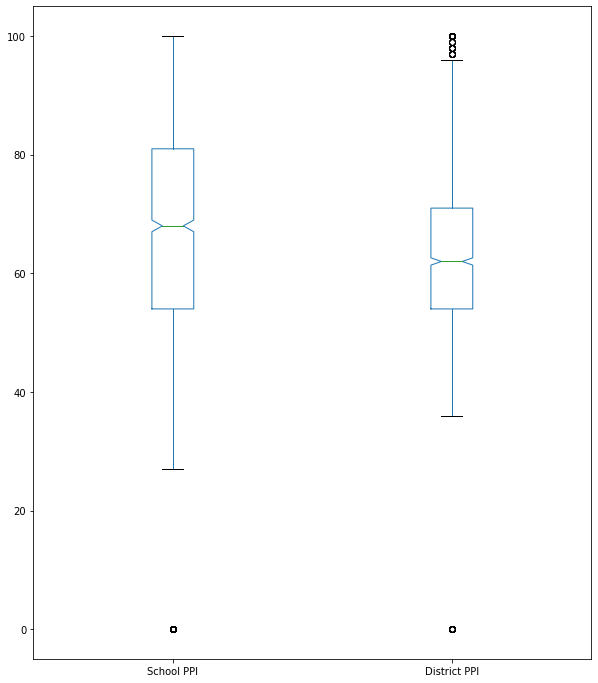

The Median School PPI is : 68.0 . We can derive that any neighborhood with School PPI > 71% is good for families with children


In [293]:
# Box Plot 
cmsdf.plot(kind='box', figsize=(10, 12), notch=True)
plt.show()
print("The Median School PPI is :", cmsdf['School PPI'].median(), '. We can derive that any neighborhood with School PPI > 71% is good for families with children')

#### Calculate a Number of Top Schools within a Zip Code
If Individual School PPI is Greater than Median School PPI value of (71%) then Count it as a Best School

In [ ]:
# Take only relevant columns
msdf = msdf[['Zip','School PPI','District PPI']]
# Top School Count - If School PPI is Greater than Median School PPI value of (71%)
msdf['TopSchoolCount'] = np.where(msdf['School PPI'] > 71.0, 1, 0)
#msdf['TopSchoolCount'] = np.where((msdf['School PPI'] > msdf['District PPI']) & (msdf['School PPI'] > msdf['School PPI'].median()), 1, 0)
#print(msdf.dtypes)
#msdf.head()

In [295]:
#msdf.drop(msdf.columns[[2, 3]], axis = 1, inplace = True) 
#msdf.head()
# Get Number of Top Schools within a Zip Code  
msdf = msdf.groupby(['Zip'])['TopSchoolCount'].sum().reset_index()
msdf.head()

,Zip,TopSchoolCount
0,01001,0
1,01002,1
2,01005,0
3,01007,1
4,01010,1


In [296]:
# Write DataFrame to CSV 
msdf.to_csv('Upd_MA_Public_Schools_2017.csv', index=False)

In [51]:
school = pd.read_csv('Upd_MA_Public_Schools_2017.csv') 
#venue_details.columns=["Region","Homes Sold","Inventory","Median Sale Price","New Listings"]
school['Zip']=school['Zip'].apply(lambda x: '{0:0>5}'.format(x))

In [52]:
school.head()

,Zip,TopSchoolCount
0,01001,0
1,01002,1
2,01005,0
3,01007,1
4,01010,1


In [53]:
venue_details.shape

(415, 15)

#### JOIN PRIMARY Data Set and MA Cities with Top School Counts

In [54]:
venue_details = pd.merge(left=venue_details, right=school, left_on='Zip', right_on='Zip', how ='left')

In [55]:
venue_details.head()

,Zip,Neighborhood,recreation_count,fitness_count,hospital_count,eateries_count,groceries_count,Latitude,Longitude,Median Sale Price,Walk Score,Transit Score,Bike Score,Population,Total_crimes,TopSchoolCount
0,02351,Abington,2,3,0,16,1,42.119534,-70.94787,360000.0,0.0,0.0,0.0,0.0,188.0,1.0
1,01720,Acton,2,5,0,22,2,42.477142,-71.44220,604000.0,0.0,0.0,0.0,0.0,182.0,6.0
2,02743,Acushnet,1,0,0,13,1,41.697015,-70.91019,306000.0,0.0,0.0,0.0,0.0,88.0,1.0
3,02134,Allston,4,1,0,32,0,42.355147,-71.13164,560000.0,0.0,0.0,0.0,0.0,0.0,0.0
4,01913,Amesbury,2,3,0,16,2,42.854423,-70.93547,375000.0,0.0,0.0,0.0,0.0,175.0,0.0


In [56]:
venue_details=venue_details.replace(np.NaN,0)

In [57]:
venue_details=venue_details.drop(['Population','hospital_count'], axis=1)

In [58]:
venue_details.shape

(415, 14)

In [168]:
venue_details['Total_crimes']=-1 * venue_details['Total_crimes']

In [59]:
venue_details.to_csv('schools_crimes_transit_city_attr_lat_long_median_price.csv',index=False)

#### Resultant Data Set CSV File (Primary+Secodnary) - The 'schools_crimes_transit_city_attr_lat_long_median_price.csv' file is the final CSV file 

In [4]:
venue_details = pd.read_csv('schools_crimes_transit_city_attr_lat_long_median_price.csv')
venue_details['Zip'] = venue_details['Zip'].astype(str) #int
venue_details.dtypes

Zip                   object
Neighborhood          object
recreation_count       int64
fitness_count          int64
eateries_count         int64
groceries_count        int64
Latitude             float64
Longitude            float64
Median Sale Price    float64
Walk Score           float64
Transit Score        float64
Bike Score           float64
Total_crimes         float64
TopSchoolCount       float64
dtype: object

#### Create a Correlation Matrix for Data Exploration

In [9]:
venue_details.corr()

,recreation_count,fitness_count,eateries_count,groceries_count,Latitude,Longitude,Median Sale Price,Walk Score,Transit Score,Bike Score,Total_crimes,TopSchoolCount
recreation_count,1.000000,0.090716,0.380197,-0.108236,-0.098852,0.537474,0.318862,0.093013,0.119780,0.069122,0.194718,0.049518
fitness_count,0.090716,1.000000,0.576378,0.134262,0.263200,0.000356,0.239613,0.265656,0.258772,0.272963,0.241690,0.289822
eateries_count,0.380197,0.576378,1.000000,0.152317,0.125538,0.196289,0.233465,0.333394,0.304205,0.325789,0.353826,0.327294
groceries_count,-0.108236,0.134262,0.152317,1.000000,0.088881,0.000966,-0.148630,0.150775,0.117516,0.137926,-0.127797,0.147417
Latitude,-0.098852,0.263200,0.125538,0.088881,1.000000,-0.468261,0.022505,0.177948,0.134030,0.163914,0.103056,0.223001
Longitude,0.537474,0.000356,0.196289,0.000966,-0.468261,1.000000,0.234077,0.015013,0.032024,0.018465,0.030226,-0.020626
Median Sale Price,0.318862,0.239613,0.233465,-0.148630,0.022505,0.234077,1.000000,0.032230,0.048884,0.052284,0.245400,0.123493
Walk Score,0.093013,0.265656,0.333394,0.150775,0.177948,0.015013,0.032230,1.000000,0.897708,0.977337,-0.008212,0.384302
Transit Score,0.119780,0.258772,0.304205,0.117516,0.134030,0.032024,0.048884,0.897708,1.000000,0.876366,0.025269,0.356251
Bike Score,0.069122,0.272963,0.325789,0.137926,0.163914,0.018465,0.052284,0.977337,0.876366,1.000000,-0.015562,0.393654


##### Correlation Observations:
We simply observed the correaltion patterns between all features. As expected, There were no significant coorelations. For E.g. Home Prices, We have ONLY sourced the Median Home Prices rolled up at a Neighborhood level, NOT the individual Home Prices. The individual home prices may depend upon other features like Age of Home, Lot Size, SQFT Area, # of Bed Rooms, # of Bathrooms etc. 
So we decided to take the below parameters for our Exploratory Analysis and Recommendation.

1. Top School Count within a Neighborhood - Higher the better
2. Recreation Count within a Neighborhood - Higher the better
3. Transit Score within a Neighborhood - Higher the better 
4. Crime Stats within a Neighborhood - Lower the better

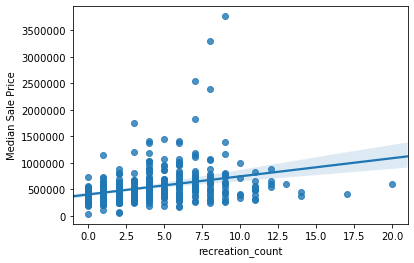

In [10]:
sns.regplot(x="recreation_count", y="Median Sale Price", data=venue_details)

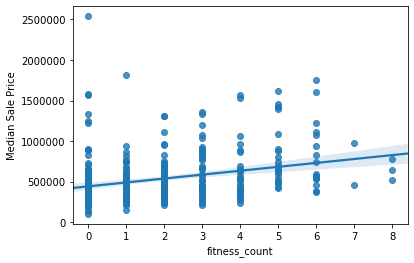

In [108]:
sns.regplot(x="fitness_count", y="Median Sale Price", data=venue_details)

In [7]:
venue_details.dtypes

Zip                   object
Neighborhood          object
recreation_count       int64
fitness_count          int64
eateries_count         int64
groceries_count        int64
Latitude             float64
Longitude            float64
Median Sale Price    float64
Walk Score           float64
Transit Score        float64
Bike Score           float64
Total_crimes         float64
TopSchoolCount       float64
dtype: object

#### Ran a Multiple Linear Regression Model - as an Exploratory Method

In [8]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
Z = venue_details[['recreation_count', 'fitness_count', 'eateries_count', 'groceries_count','Walk Score','Transit Score','Bike Score','Total_crimes','TopSchoolCount']]

In [9]:
lm.fit(Z, venue_details['Median Sale Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
lm.intercept_

347809.38233540853

In [11]:
lm.coef_

array([ 3.04545289e+04,  3.83994512e+04, -9.97158561e+02, -6.65980419e+04,
       -1.01557197e+04, -2.16053341e+02,  1.09484432e+04,  1.21073400e+01,
        1.76390801e+04])

In [12]:
Y_hat = lm.predict(Z)

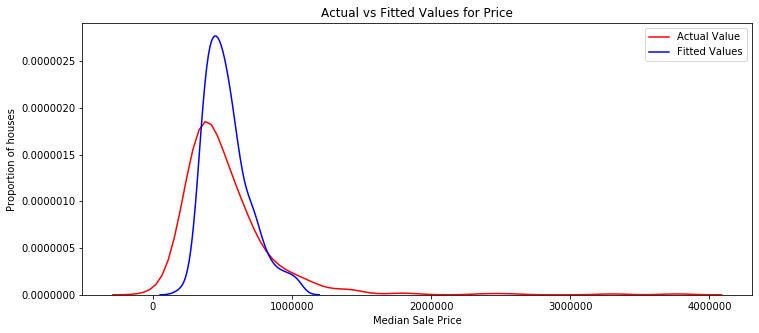

In [13]:
width = 12
height = 5
plt.figure(figsize=(width, height))
ax1 = sns.distplot(venue_details['Median Sale Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Median Sale Price')
plt.ylabel('Proportion of houses')
plt.ylim(0,)
plt.show()
plt.close()

In [43]:
conda install -c conda-forge basemap-data-hires

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [11]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

pdf=venue_details

#### DBSCAN Clustering Results - Based on Latitude & Longitude 

In [16]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=5).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

# A sample of clusters
pdf[["Zip","Neighborhood","Median Sale Price","Clus_Db"]].head(15)

,Zip,Neighborhood,Median Sale Price,Clus_Db
0,2351,Abington,360000.0,3
1,1720,Acton,604000.0,0
2,2743,Acushnet,306000.0,10
3,2134,Allston,560000.0,1
4,1913,Amesbury,375000.0,-1
5,1899,Andover,683000.0,1
6,1810,Andover,597000.0,9
7,2476,Arlington,794000.0,1
8,2474,Arlington,810000.0,1
9,1430,Ashburnham,265000.0,-1


#### Plot DBSCAN Clustering Results - Based on Latitude & Longitude 

In [17]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

#### Top 50 Neighborhoods based on Best Schools, Best Public Transit, Best Recreation Spaces, Lowest Crime Count

In [11]:
venue_details3=venue_details.sort_values(by=['TopSchoolCount', 'Transit Score','recreation_count','Total_crimes'],ascending=False).head(50)

In [12]:
venue_details3.head()

,Zip,Neighborhood,recreation_count,fitness_count,eateries_count,groceries_count,Latitude,Longitude,Median Sale Price,Walk Score,Transit Score,Bike Score,Total_crimes,TopSchoolCount
58,2184,Braintree,1,5,19,0,42.209555,-70.99968,510000.0,37.0,33.0,35.0,539.0,9.0
41,2128,Boston,9,1,33,0,42.378297,-71.02550,638000.0,0.0,0.0,0.0,18331.0,8.0
223,1760,Natick,2,4,13,0,42.290763,-71.35368,630000.0,0.0,0.0,0.0,475.0,8.0
137,2038,Franklin,0,4,19,0,42.089104,-71.40690,440000.0,21.0,0.0,28.0,90.0,8.0
399,1890,Winchester,6,3,41,1,42.451945,-71.14276,1075000.0,38.0,29.0,43.0,118.0,7.0


#### Data Visualization

In [7]:
#bos_map = folium.Map(location=[42.365028, -71.05636], zoom_start=10)
from folium import plugins
bos_map = folium.Map(location=[42.2793, -71.4262], zoom_start=8.5) # Framingham to Center the map

In [8]:
venue_details1=venue_details
venue_details1.head()

,Zip,Neighborhood,recreation_count,fitness_count,eateries_count,groceries_count,Latitude,Longitude,Median Sale Price,Walk Score,Transit Score,Bike Score,Total_crimes,TopSchoolCount
0,2351,Abington,2,3,16,1,42.119534,-70.94787,360000.0,0.0,0.0,0.0,188.0,1.0
1,1720,Acton,2,5,22,2,42.477142,-71.44220,604000.0,0.0,0.0,0.0,182.0,6.0
2,2743,Acushnet,1,0,13,1,41.697015,-70.91019,306000.0,0.0,0.0,0.0,88.0,1.0
3,2134,Allston,4,1,32,0,42.355147,-71.13164,560000.0,0.0,0.0,0.0,0.0,0.0
4,1913,Amesbury,2,3,16,2,42.854423,-70.93547,375000.0,0.0,0.0,0.0,175.0,0.0


In [55]:
venue_details1.head()
venue_details1.shape

(415, 14)

#### Data Visualization - Median Home Sale Prices Distribution Choropleth Map - Recommendation

In [18]:
from folium import plugins
bos_map = folium.Map(location=[42.2793, -71.4262], zoom_start=8.5) # Framingham to Center the map

In [22]:
bos_map = folium.Map(location=[42.2793, -71.4262], zoom_start=8.5) # Framingham to Center the map

ma_geo = r'MA_City_Town_Boundaries_Survey-derived.json'  # 351 towns good
venue_details2 = venue_details1.groupby(['Neighborhood'])['Median Sale Price'].mean().reset_index()
venue_details2['Neighborhood'] = venue_details2['Neighborhood'].str.upper() 
print(venue_details2.head())
print('minval: ', venue_details2['Median Sale Price'].min())
print('maxval: ', venue_details2['Median Sale Price'].max())
# create a numpy array of length 5 and has linear spacing from the minium total Median Sale Price to the maximum total Median Sale Price
#threshold_scale = np.linspace(venue_details2['Median Sale Price'].min(),venue_details2['Median Sale Price'].max(),
threshold_scale = np.linspace(300000,1500000,
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum Median Sale Price

#df1.groupby(['State'])['Sales'].mean().reset_index()
bos_map.choropleth(
    geo_data=ma_geo,
    data=venue_details2,
    #columns=['County', 'Median Sale Price'],
    columns=['Neighborhood', 'Median Sale Price'],
    #key_on='feature.properties.NAME',
    key_on='feature.properties.TOWN',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.6, 
    line_opacity=0.2,
    legend_name='Median Sale Price'
    )

# display map
# as this is huge map data , we will save it to a file
bos_map.save('bos_map_home_price.html')

  Neighborhood  Median Sale Price
0     ABINGTON           360000.0
1        ACTON           604000.0
2     ACUSHNET           306000.0
3      ALLSTON           560000.0
4     AMESBURY           375000.0
minval:  35000.0
maxval:  3765000.0


#### Data Visualization - Top School Count Distribution Choropleth Map - Recommendation

In [23]:
school_map = folium.Map(location=[42.2793, -71.4262], zoom_start=8.5) # Framingham to Center the map

ma_geo = r'MA_City_Town_Boundaries_Survey-derived.json'  # 351 towns good
venue_details2 = venue_details1.groupby(['Neighborhood'])['TopSchoolCount'].sum().reset_index()
venue_details2['Neighborhood'] = venue_details2['Neighborhood'].str.upper() 
print(venue_details2.head())
# create a numpy array of length 5 and has linear spacing from the minium total Median Sale Price to the maximum total Median Sale Price
#threshold_scale = np.linspace(venue_details2['Median Sale Price'].min(),venue_details2['Median Sale Price'].max(),
threshold_scale = np.linspace(venue_details2['TopSchoolCount'].min(),venue_details2['TopSchoolCount'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum Median Sale Price

school_map.choropleth(
    geo_data=ma_geo,
    data=venue_details2,
    columns=['Neighborhood', 'TopSchoolCount'],
    key_on='feature.properties.TOWN',
    threshold_scale=threshold_scale,
    fill_color='PuBu', 
    fill_opacity=0.7, 
    line_opacity=0.3,
    legend_name='TopSchoolCount'
    )

# display map
# as this is huge map data , we will save it to a file
#school_map
school_map.save('school_map_home_price.html')

  Neighborhood  TopSchoolCount
0     ABINGTON             1.0
1        ACTON             6.0
2     ACUSHNET             1.0
3      ALLSTON             0.0
4     AMESBURY             0.0


#### Data Visualization - Crime Counts Distribution Choropleth Map - Recommendation

In [24]:
crm_map = folium.Map(location=[42.2793, -71.4262], zoom_start=8.5) # Framingham to Center the map
#venue_details1['Total_crimes'] = venue_details1['Total_crimes']*-1

ma_geo = r'MA_City_Town_Boundaries_Survey-derived.json'  # 351 towns good
venue_details2 = venue_details1.groupby(['Neighborhood'])['Total_crimes'].mean().reset_index()
venue_details2['Neighborhood'] = venue_details2['Neighborhood'].str.upper() 
print(venue_details2.head())
# create a numpy array of length 5 and has linear spacing from the minium total Median Sale Price to the maximum total Median Sale Price
#threshold_scale = np.linspace(venue_details2['Median Sale Price'].min(),venue_details2['Median Sale Price'].max(),
threshold_scale = np.linspace(venue_details2['Total_crimes'].min(),venue_details2['Total_crimes'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum Median Sale Price

crm_map.choropleth(
    geo_data=ma_geo,
    data=venue_details2,
    columns=['Neighborhood', 'Total_crimes'],
    key_on='feature.properties.TOWN',
    threshold_scale=threshold_scale,
    fill_color='GnBu', 
    fill_opacity=0.7, 
    line_opacity=0.3,
    legend_name='Total_crimes'
    )

# display map
# as this is huge map data , we will save it to a file
crm_map
crm_map.save('crm_map_home_price.html')

  Neighborhood  Total_crimes
0     ABINGTON         188.0
1        ACTON         182.0
2     ACUSHNET          88.0
3      ALLSTON           0.0
4     AMESBURY         175.0


In [9]:
macr = pd.read_csv('MA_City_Crime_Rate.csv')
vd=venue_details1[['Latitude','Longitude','Neighborhood']]

vd = pd.merge(left=vd, right=macr, left_on='Neighborhood', right_on='City')
vd.head()
# Write DataFrame to CSV 
vd.to_csv('crjoin.csv', index=False)
vd=pd.read_csv('MA_Crime_Rate_City_LatLon.csv')

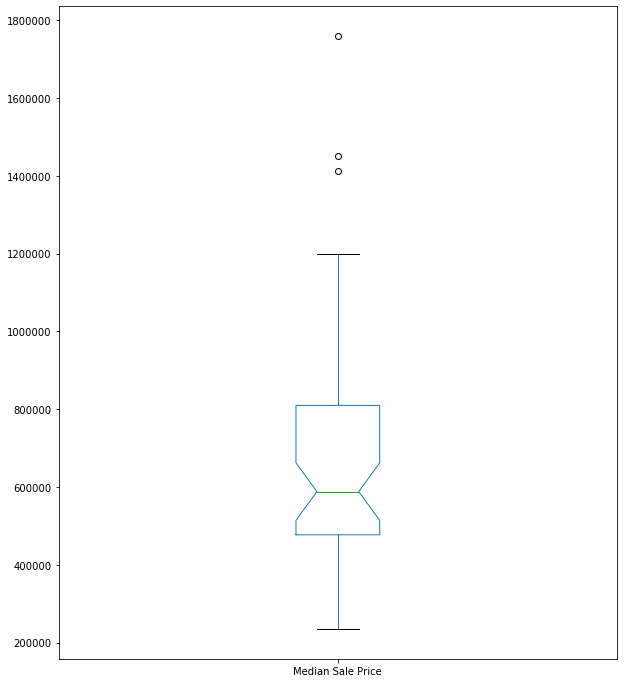

In [26]:
venue_details3['Median Sale Price'].median()
bp = venue_details3['Median Sale Price']
venue_details3['Median Sale Price'].plot(kind='box', figsize=(10, 12), notch=True)
plt.show()

#### CONCLUSION - Recommendation - Top 50 Neighborhoods in MA for Young Family with Children to own a Home

In [13]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the neighborhood and add each to the feature group
for lat, lng, rate in vd[['Latitude','Longitude','Crime Rate']].values:
    incidents.add_child(
        folium.CircleMarker(            
            [lat, lng],
            radius= rate*10, #5, # define how big you want the circle markers to be
            color='red', #None, #'#007849', #'yellow', 
            fill=True,
            fill_color='red', #'#007849', #'green',
            fill_opacity=0.6,
            popup=None
        )
    ).add_to(bos_map)

# loop through the neighborhood and add each to the feature group
for lat, lng, price in venue_details3[['Latitude','Longitude','Median Sale Price']].values:
    incidents.add_child(
        folium.CircleMarker(            
            [lat, lng],
            radius= price/150000, #5, # define how big you want the circle markers to be
            color='yellow', #None, #'#007849', #'yellow', 
            fill=True,
            fill_color='blue', #'#007849', #'green',
            fill_opacity=0.6,
            popup=price.astype(str)
        )
    ).add_to(bos_map)

#bos_map
bos_map.save('conclusion.html')

### Top 50 Neighborhoods in MA

In [32]:
venue_details3=venue_details3[['Neighborhood','Median Sale Price','TopSchoolCount', 'Transit Score','recreation_count','Total_crimes']]

# Write DataFrame to CSV 
venue_details3.to_csv('Conclusion.csv', index=False)

# Conclusion:
The answers to our business problems discussed above:

1. Which Neighborhood has the most Parks & Recreation avenues for a young family with toddlers/kids?
The Top 10 Neighborhoods with most recreation avenues:
Nahant
Brewster
Lynn
Orleans
Prides Crossing
Swampscott
North Eastham
West Dennis
North Chatham
Marblehead

2. Which Neighborhood has the most Best Public Schools?
The Top 10 Neighborhoods with best public schools:
Braintree
Boston
Franklin
Natick
Winchester
Attleboro
Andover
Westford
Westwood
Revere

3. Which Neighborhood has the best transit score for easy commute?
The Top 10 Neighborhoods with best transit scores:
Cambridge
Boston
Brookline
Somerville
Chelsea
Revere
Malden
Medford
Everett
Quincy

4. Which Neighborhood is safest with the least Crime Rate?
The Top 10 Neighborhoods with least crime rates:
Wayland
New Braintree
Princeton
Chilmark
Dover
Nahant
Oakham
Boylston
Wenham
Paxton

5. Suggest Top 50 Best Neighborhoods in Massachusetts for a "Young Family with Kids" to own a home.
The Top 50 Neighborhoods in MA for "Young Family with Kids" to own a Home are:
Braintree, Boston, Natick, Franklin, Winchester, Attleboro, Westwood, Andover, Westford, Revere, Newton Center, Belmont, Melrose, Fitchburg, Marblehead, Hingham, Marshfield, Lexington, Wellesley Hills, Acton, Sudbury, Westborough, Everett, Lynn, Lawrence, Brockton, Salem, Gloucester, Wakefield, Quincy, Newtonville, Cambridge, Concord, Weston, Scituate, Sharon, Billerica, Shrewsbury, Cambridge, Boston, Malden, Quincy, Arlington, Needham, Swampscott, Brookline, Boston, Beverly, Roslindale and Wayland.


